In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 처리할 이미지 범위 지정
start = 7 
end = 10

# 개별 이미지들의 처리 point 좌표 (x, y)
total_pts = {}
for i in range(start, end+1):
    total_pts[i] = {'p1' : [],  # 생장 영역 좌표 
                    'p2' : []}  # 유지 영역 좌표 

### Image Data

In [3]:
root_path = 'F:/RGB-NIR/'
mode = 3

data_path = root_path + str(mode)

evi_path = data_path + '/' + 'EVI_re'  # EVI 이미지 폴더 경로
evi785_path = data_path + '/' + 'EVI_785'  # EVI 785 이미지 폴더 경로

evi_img_list = os.listdir(evi_path)
evi_img_dict = {idx:evi_path+'/'+ img_path for idx, img_path in enumerate(evi_img_list)}   

evi785_img_list = os.listdir(evi785_path)
evi785_img_dict = {idx:evi785_path+'/'+img_path for idx, img_path in enumerate(evi785_img_list)}   

In [5]:
evi_img_dict 

{0: 'F:/RGB-NIR/3/EVI_re/211130_3.bmp',
 1: 'F:/RGB-NIR/3/EVI_re/211201_3.bmp',
 2: 'F:/RGB-NIR/3/EVI_re/211202_3.bmp',
 3: 'F:/RGB-NIR/3/EVI_re/211203_3.bmp',
 4: 'F:/RGB-NIR/3/EVI_re/211204_3.bmp',
 5: 'F:/RGB-NIR/3/EVI_re/211205_3.bmp',
 6: 'F:/RGB-NIR/3/EVI_re/211206_3.bmp',
 7: 'F:/RGB-NIR/3/EVI_re/211207_3.bmp',
 8: 'F:/RGB-NIR/3/EVI_re/211208_3.bmp',
 9: 'F:/RGB-NIR/3/EVI_re/211209_3.bmp',
 10: 'F:/RGB-NIR/3/EVI_re/211210_3.bmp',
 11: 'F:/RGB-NIR/3/EVI_re/211211_3.bmp',
 12: 'F:/RGB-NIR/3/EVI_re/211212_3.bmp',
 13: 'F:/RGB-NIR/3/EVI_re/211213_3.bmp',
 14: 'F:/RGB-NIR/3/EVI_re/211214_3.bmp',
 15: 'F:/RGB-NIR/3/EVI_re/211215_3.bmp',
 16: 'F:/RGB-NIR/3/EVI_re/211216_3.bmp',
 17: 'F:/RGB-NIR/3/EVI_re/211217_3.bmp',
 18: 'F:/RGB-NIR/3/EVI_re/211218_3.bmp',
 19: 'F:/RGB-NIR/3/EVI_re/211219_3.bmp',
 20: 'F:/RGB-NIR/3/EVI_re/211220_3.bmp',
 21: 'F:/RGB-NIR/3/EVI_re/211221_3.bmp',
 22: 'F:/RGB-NIR/3/EVI_re/211222_3.bmp',
 23: 'F:/RGB-NIR/3/EVI_re/211223_3.bmp',
 24: 'F:/RGB-NIR/3/EVI_re/

### 마우스 클릭으로 좌표 추출

In [9]:
# 마우스 이벤트 처리 함수 (참고: https://github.com/gymoon10/OpenCV/blob/main/OpenCV%20%EC%82%AC%EC%9A%A9%EB%B2%95.ipynb)
def on_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    # 좌클릭에 반응
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))
        
        result.append((x, y))
        
    return result

In [10]:
# 개별 이미지 별로 생장 영역(p1) 좌표 추출
# 각 이미지 마다 생장 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(evi_img_dict[i])  # EVI 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = evi_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 0), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p1'] = result

EVENT_LBUTTONDOWN: 740, 334
EVENT_LBUTTONDOWN: 703, 349
EVENT_LBUTTONDOWN: 721, 377
EVENT_LBUTTONDOWN: 699, 404
EVENT_LBUTTONDOWN: 723, 398
EVENT_LBUTTONDOWN: 779, 295
EVENT_LBUTTONDOWN: 757, 322
EVENT_LBUTTONDOWN: 750, 359
EVENT_LBUTTONDOWN: 782, 262
EVENT_LBUTTONDOWN: 722, 262
EVENT_LBUTTONDOWN: 763, 282
EVENT_LBUTTONDOWN: 720, 288
EVENT_LBUTTONDOWN: 760, 301
EVENT_LBUTTONDOWN: 711, 316
EVENT_LBUTTONDOWN: 746, 332
EVENT_LBUTTONDOWN: 702, 338
EVENT_LBUTTONDOWN: 731, 229
EVENT_LBUTTONDOWN: 745, 274
EVENT_LBUTTONDOWN: 772, 300
EVENT_LBUTTONDOWN: 706, 337


In [11]:
# 개별 이미지 별로 유지 영역(p1) 좌표 추출
# 각 이미지 마다 유지 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(evi_img_dict[i])  # EVI 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = evi_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 0), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Non-Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p2'] = result

EVENT_LBUTTONDOWN: 501, 500
EVENT_LBUTTONDOWN: 467, 471
EVENT_LBUTTONDOWN: 417, 462
EVENT_LBUTTONDOWN: 464, 506
EVENT_LBUTTONDOWN: 486, 487
EVENT_LBUTTONDOWN: 461, 517
EVENT_LBUTTONDOWN: 401, 543
EVENT_LBUTTONDOWN: 454, 550
EVENT_LBUTTONDOWN: 463, 518
EVENT_LBUTTONDOWN: 423, 520
EVENT_LBUTTONDOWN: 467, 533
EVENT_LBUTTONDOWN: 496, 524
EVENT_LBUTTONDOWN: 476, 504
EVENT_LBUTTONDOWN: 430, 536
EVENT_LBUTTONDOWN: 480, 492
EVENT_LBUTTONDOWN: 451, 526
EVENT_LBUTTONDOWN: 431, 545
EVENT_LBUTTONDOWN: 496, 520
EVENT_LBUTTONDOWN: 479, 565
EVENT_LBUTTONDOWN: 450, 585
EVENT_LBUTTONDOWN: 442, 598


In [12]:
total_pts  # (x, y)

{7: {'p1': [(740, 334), (703, 349), (721, 377), (699, 404), (723, 398)],
  'p2': [(501, 500), (467, 471), (417, 462), (464, 506)]},
 8: {'p1': [(779, 295), (757, 322), (750, 359)],
  'p2': [(486, 487),
   (461, 517),
   (401, 543),
   (454, 550),
   (463, 518),
   (423, 520),
   (467, 533),
   (496, 524),
   (476, 504),
   (430, 536)]},
 9: {'p1': [(782, 262),
   (722, 262),
   (763, 282),
   (720, 288),
   (760, 301),
   (711, 316),
   (746, 332),
   (702, 338)],
  'p2': [(480, 492), (451, 526), (431, 545)]},
 10: {'p1': [(731, 229), (745, 274), (772, 300), (706, 337)],
  'p2': [(496, 520), (479, 565), (450, 585), (442, 598)]}}

In [275]:
# leaf_points.m (mode=3) - 실험용
total_pts = {7: {'p1': [(704, 338), (712, 408)],
                 'p2': [(416, 436), (488, 426), (418, 502), (486, 506)]},
             8: {'p1': [(740, 298), (708, 358), (724, 398)],
                 'p2': [(432, 484), (490, 468), (426, 552), (496, 536)]},
             9: {'p1': [(710, 280), (764, 302), (688, 326), (736, 362)],
                 'p2': [(444, 492), (438, 566), (498, 544)]},
             10: {'p1': [(723, 232), (776, 278), (692, 316), (750, 340)],
                  'p2': [(466, 530), (454, 610), (504, 590)]}}

### 좌표 확인 (영역 시각화)

In [15]:
for i in range(start, end+1):
    r = 10
    img = cv2.imread(evi_img_dict[i])
    
    save_path = data_path + '/' + 'results' + '/' 'EVI'
    
    pts = total_pts[i]
    pts_p1 = pts['p1']
    pts_p2 = pts['p2']
    
    for pt in pts_p1:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 128, 0), -1)  # 초록색 : 생장 영역
        
    for pt in pts_p2:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 0, 128), -1)  # 빨간색 : 유지 영역
    
    # 텍스트
    text1 = evi_img_dict[i].split('/')[-1]
    cv2.putText(img, text1, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 0), 1, cv2.LINE_AA)
    text2 = 'Growth'
    cv2.putText(img, text2, (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 255, 0), 1, cv2.LINE_AA)
    text3 = 'Non-Growth'
    cv2.putText(img, text3, (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 255), 1, cv2.LINE_AA)
    
    cv2.imshow("img", img)
    cv2.imwrite(save_path + '/' + str(i) + '_' + text1, img)  # 이미지 저장 (생장, 유지 포인트 표시)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 좌표를 중심으로한 일정 영역의 NIR 평균 계산

위에서 구한 total_pts의 좌표를 중심으로한 특정 직사각형 영역의 NIR 평균 계산

In [17]:
r = 10  # 영역 지정 변수
p1_mean = [] ; p2_mean = []  # 정규화한 EVI 이미지의 EVI 평균값 저장 
p1_mean2 = [] ; p2_mean2 = []  # 정규화한 EVI 785이미지의 EVI 평균값 저장

In [18]:
# p1_mean 계산
for i in range(start, end+1):
    evi_img = cv2.imread(evi_img_dict[i])  # 특정 index의 EVI 이미지 불러오기
    max_val = np.max(evi_img) ; min_val = np.min(evi_img)
    
    nor_evi = (evi_img - min_val) / (max_val - min_val)  # EVI 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 생장 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_evi.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean.append(np.mean(mean_res)) 

In [19]:
# p2_mean 계산
for i in range(start, end+1):
    evi_img = cv2.imread(evi_img_dict[i])  # 특정 index의 EVI 이미지 불러오기
    max_val = np.max(evi_img) ; min_val = np.min(evi_img)
    
    nor_evi = (evi_img - min_val) / (max_val - min_val)  # EVI 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 유지 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_evi.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean.append(np.mean(mean_res)) 

In [20]:
# p1_mean2 계산
for i in range(start, end+1):
    evi785_img = cv2.imread(evi785_img_dict[i])  # 특정 index의 EVI 785 이미지 불러오기
    max_val = np.max(evi785_img) ; min_val = np.min(evi785_img)
    
    nor_evi785 = (evi785_img - min_val) / (max_val - min_val)  # EVI 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_evi785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean2.append(np.mean(mean_res)) 

In [21]:
# p2_mean2 계산
for i in range(start, end+1):
    evi785_img = cv2.imread(evi785_img_dict[i])  # 특정 index의 EVI 785 이미지 불러오기
    max_val = np.max(evi785_img) ; min_val = np.min(evi785_img)
    
    nor_evi785 = (evi785_img - min_val) / (max_val - min_val)  # EVI 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_evi785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean2.append(np.mean(mean_res)) 

### 결과 정리

In [22]:
# 생장 - 유지
leaf_mean = []
for i in range(len(p1_mean)):
    leaf_mean.append(p1_mean[i] - p2_mean[i])
    
leaf_mean2 = []
for i in range(len(p1_mean2)):
    leaf_mean2.append(p1_mean2[i] - p2_mean2[i])
    
# 100 * 생장 / 유지
leaf_ratio = []
for i in range(len(p1_mean)):
    leaf_ratio.append(100 * (p1_mean[i] / p2_mean[i]))
    
leaf_ratio2 = []
for i in range(len(p1_mean2)):
    leaf_ratio2.append(100 * (p1_mean2[i] / p2_mean2[i]))

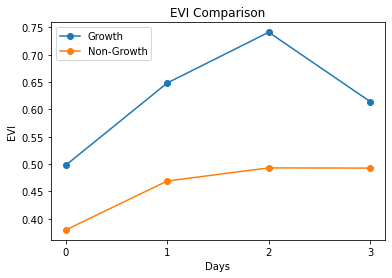

In [23]:
days = list(range(0, end-start+1))

plt.plot(p1_mean, marker='o', label='Growth')
plt.plot(p2_mean, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('EVI')
plt.title('EVI Comparison')
plt.legend(loc='best') 
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_comparison.png')

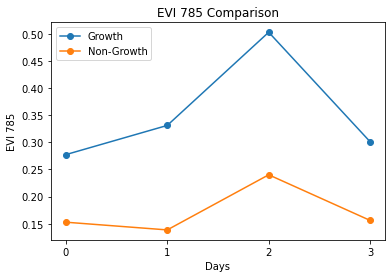

In [24]:
plt.plot(p1_mean2, marker='o', label='Growth')
plt.plot(p2_mean2, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('EVI 785')
plt.title('EVI 785 Comparison')
plt.legend(loc='best') 
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_785_comparison.png')

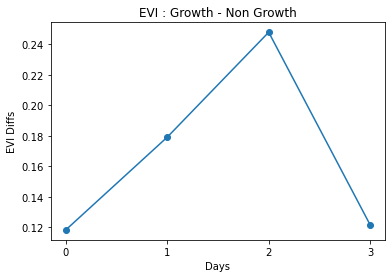

In [25]:
plt.plot(leaf_mean, marker='o')
plt.xticks(days)
plt.title('EVI : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('EVI Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_Diff.png')

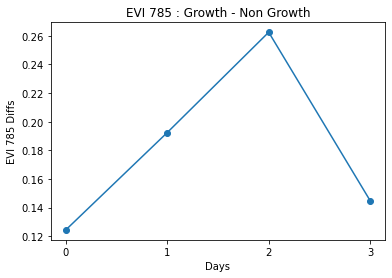

In [26]:
plt.plot(leaf_mean2, marker='o')
plt.xticks(days)
plt.title('EVI 785 : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('EVI 785 Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_785_Diff.png')

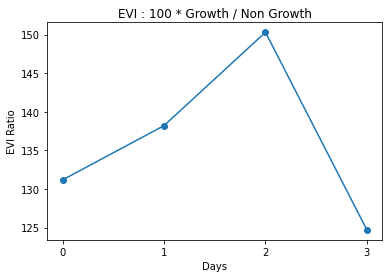

In [27]:
plt.plot(leaf_ratio, marker='o')
plt.xticks(days)
plt.title('EVI : 100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('EVI Ratio')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_Ratio.png')

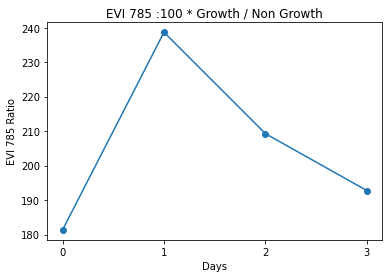

In [28]:
plt.plot(leaf_ratio2, marker='o')
plt.xticks(days)
plt.title('EVI 785 :100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('EVI 785 Ratio')
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/EVI/EVI_785_Ratio.png')